In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import sys

from config import DATA_FOLDER, COEFFICIENTS_MEN, TESTING_DATA_RANKED_MEN, COEFFICIENTS_WOMEN, TESTING_DATA_RANKED_WOMEN
from src.Creating_Bar_Charts import Ranked_Results_Bar_Chart_Setup, Coefficients_Bar_Chart_Setup, Strongest_Numeric_Predictor_Bar_Chart_Setup, Strongest_Intuitive_Predictor_Bar_Chart_Setup

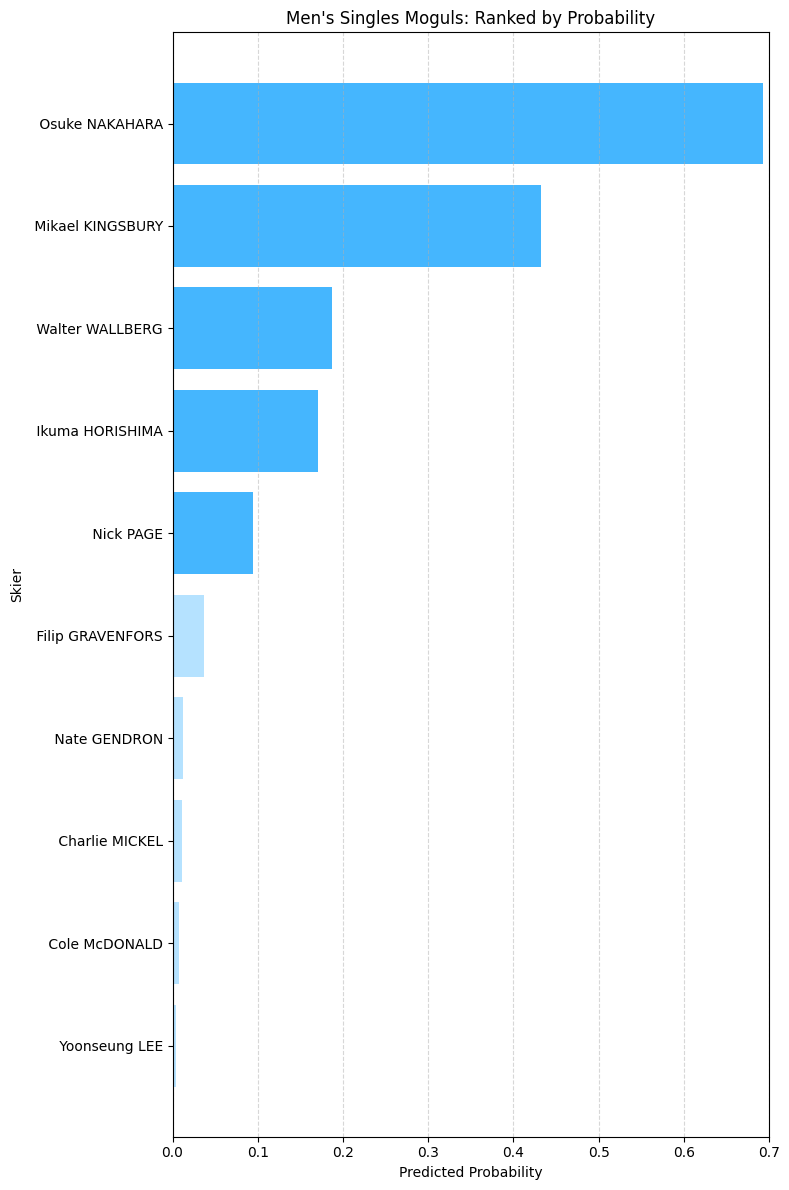

In [2]:
# Showing Top 10 Men's Ranked Results for Probabilities of Making Top 5
    # can edit to show all athletes
Ranked_Results_Bar_Chart_Setup("men")

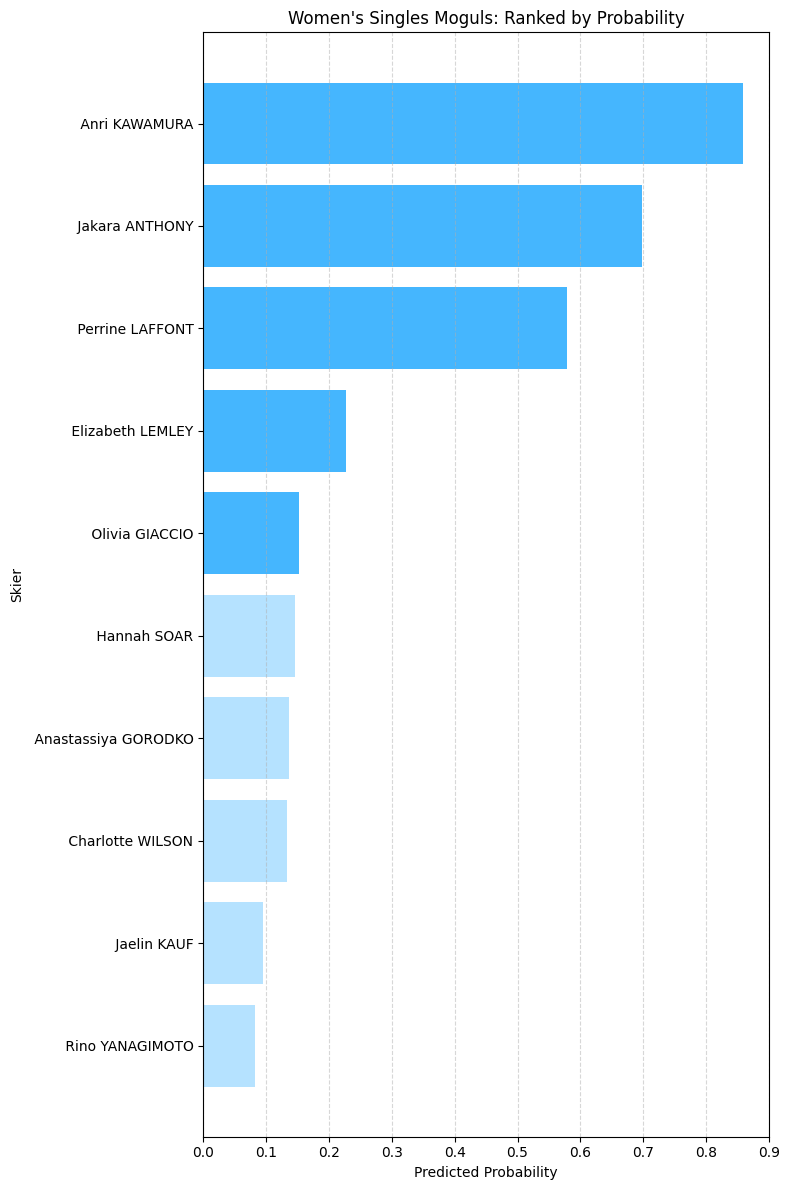

In [3]:
# Showing Top 10 Women's Ranked Results for Probabilities of Making Top 5
    # can edit to show all athletes
Ranked_Results_Bar_Chart_Setup("women")



                 Avg Final Score  Avg Time Points
Avg Final Score          1.00000          0.61178
Avg Time Points          0.61178          1.00000


                 Avg Final Score  Avg Turn Points
Avg Final Score         1.000000         0.903994
Avg Turn Points         0.903994         1.000000


                 Avg Final Score  Avg Air Points
Avg Final Score         1.000000        0.724085
Avg Air Points          0.724085        1.000000


                 Avg Final Score  Avg Rank
Avg Final Score          1.00000  -0.76381
Avg Rank                -0.76381   1.00000




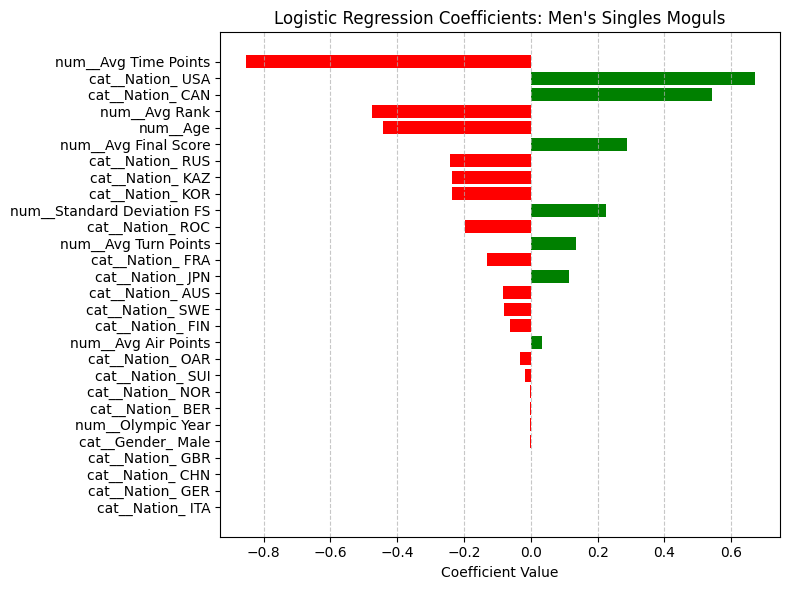

In [4]:
# Showing Men's Results for Coefficients of Features
Coefficients_Bar_Chart_Setup("men")



                 Avg Final Score  Avg Time Points
Avg Final Score         1.000000         0.901337
Avg Time Points         0.901337         1.000000


                 Avg Final Score  Avg Turn Points
Avg Final Score         1.000000         0.968429
Avg Turn Points         0.968429         1.000000


                 Avg Final Score  Avg Air Points
Avg Final Score         1.000000        0.846258
Avg Air Points          0.846258        1.000000


                 Avg Final Score  Avg Rank
Avg Final Score         1.000000 -0.918213
Avg Rank               -0.918213  1.000000




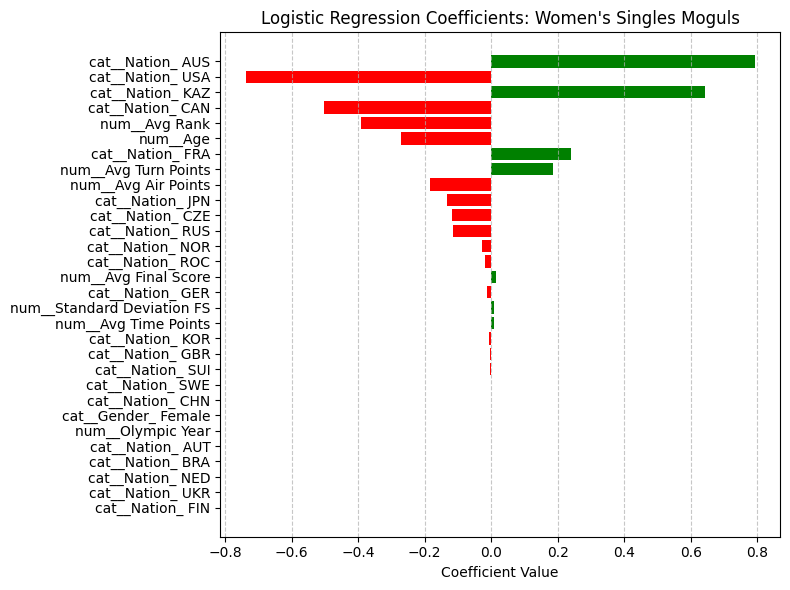

In [5]:
# Showing Women's Results for Coefficients of Features
Coefficients_Bar_Chart_Setup("women")

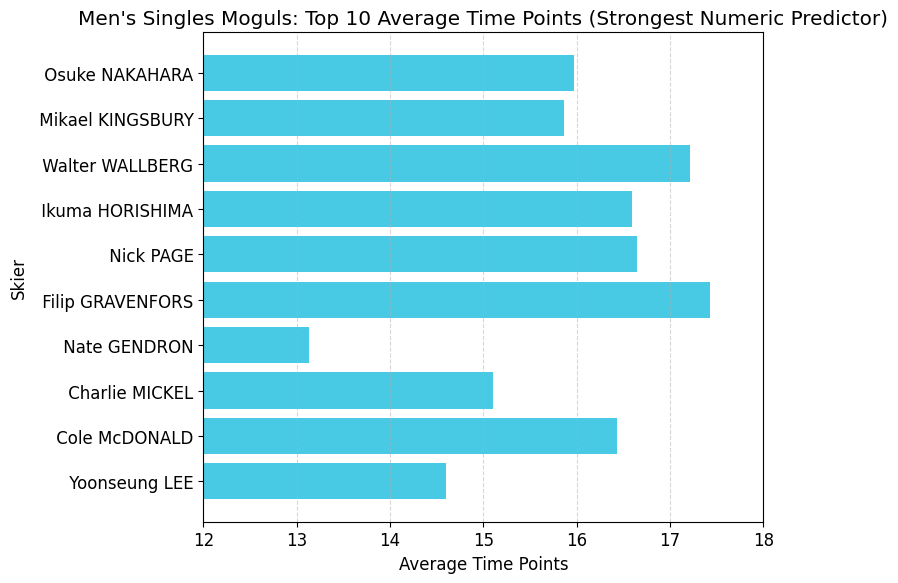

In [6]:
# Showing Men's Results for Strongest Numeric Predictor (Average Time Points)
Strongest_Numeric_Predictor_Bar_Chart_Setup("men")

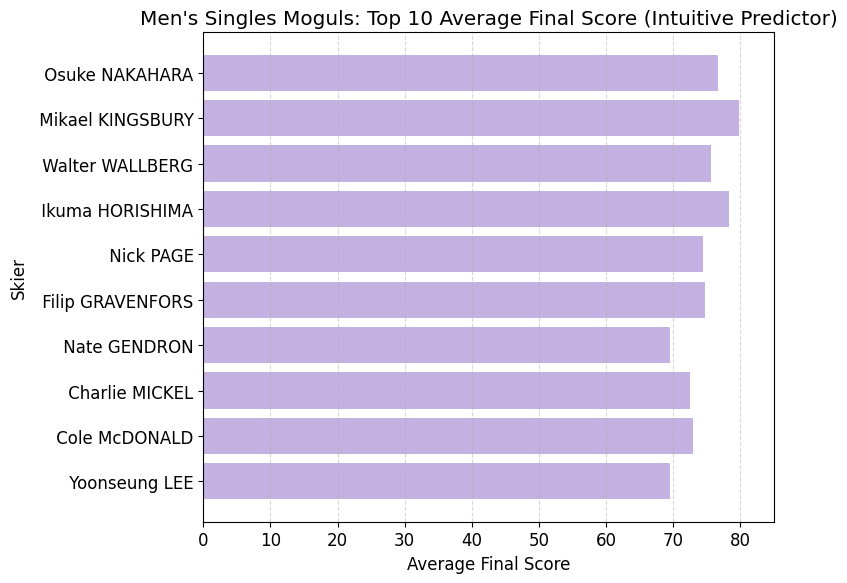

In [7]:
# Showing Men's Results for Intuitive Predictor (Average Final Score)
Strongest_Intuitive_Predictor_Bar_Chart_Setup("men")

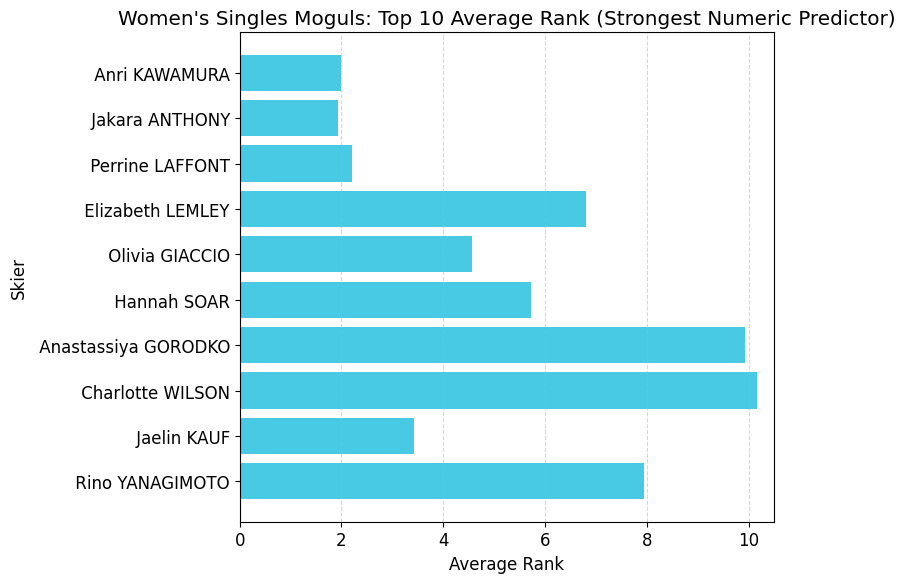

In [8]:
# Showing Women's Results for Strongest Numeric Predictor (Average Rank)
Strongest_Numeric_Predictor_Bar_Chart_Setup("women")

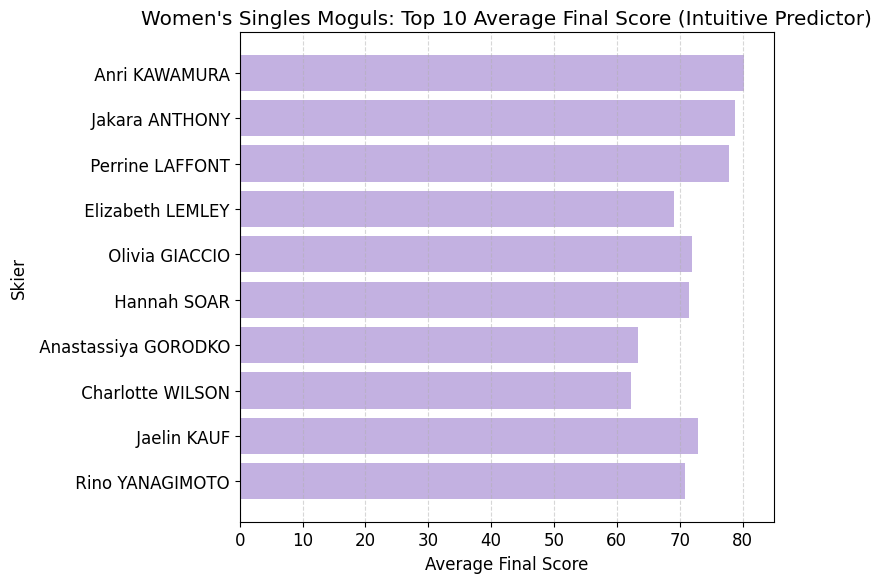

In [9]:
# Showing Women's Results for Intuitive Predictor (Average Final Score)
Strongest_Intuitive_Predictor_Bar_Chart_Setup("women")